In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
churn_ds = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
churn_ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_ds.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
churn_ds.shape

(7043, 21)

In [6]:
churn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have 7000+ observations and 21 columns inclduing, there are no missing values in the dataset which is good one. dataset has mix of variables including numeric and object type dataset.<br>
Some columns types needs changing as those are contradict in nature

In [7]:
""" TotalCharge is numeric col however it is showing object type"""
churn_ds["TotalCharges"] = pd.to_numeric(churn_ds["TotalCharges"],errors='coerce')

In [8]:
churn_ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


We see a huge variance in TotalCharges columns as Std is too high and it is right skewed

In [9]:
# taking categorical and numerical variable 

categorical_col = churn_ds.select_dtypes(include = "object")
num_col = churn_ds.select_dtypes(exclude = "object")

In [10]:
categorical_col.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3948-FVVRP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [11]:
churn_ds.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we have 11 missing values in Total Charges and who are 0.016% of the overall data. we can remove them. by checking the info() details it didnt show missing values 

In [12]:
churn_ds.dropna(inplace = True) # dropped all missing Observations

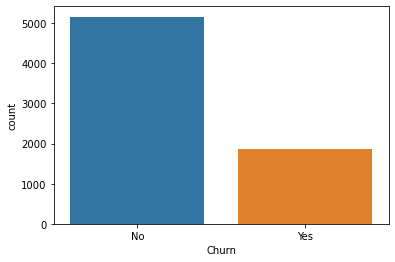

In [13]:
sns.countplot(churn_ds["Churn"]);

73% data says that customer didnt chrun however 27% customer's status is chruned and it is case of class imbalance we will treat it.

In [14]:
# checking the value of each categorical columns
def value_count(x):
    for i in categorical_col.columns:
        print(i,"\n",categorical_col[i].value_counts(),"\n")

In [15]:
value_count(categorical_col)

customerID 
 3948-FVVRP    1
3893-JRNFS    1
1971-DTCZB    1
4307-KTUMW    1
0430-IHCDJ    1
             ..
3995-WFCSM    1
4825-FUREZ    1
3938-YFPXD    1
7435-ZNUYY    1
5510-BOIUJ    1
Name: customerID, Length: 7043, dtype: int64 

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: On

Maximum category is 4 that is in payment method colunm. let check the nuremic columns status

In [16]:
# defining a function to plot distribution plot and box plot to see the distribution and outlier
def check_dis_outlier(x, variable):
    plt.figure(figsize =(10,6))
    plt.subplot(121)
    sns.distplot(x[variable])
    
    plt.subplot(122)
    sns.boxplot(x[variable])

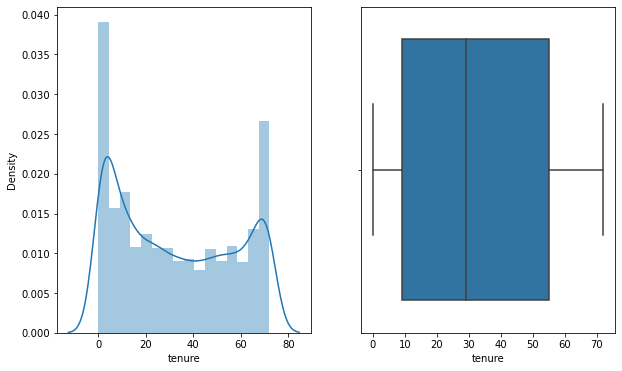

In [17]:
check_dis_outlier(num_col,"tenure")

No Outlier observed but distribution has two peaks, it is skewed one

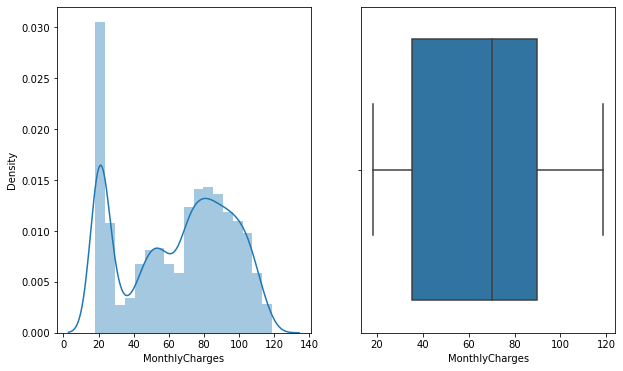

In [18]:
check_dis_outlier(num_col,"MonthlyCharges")

No Outlier observed but distribution has two peaks,it is skewed one

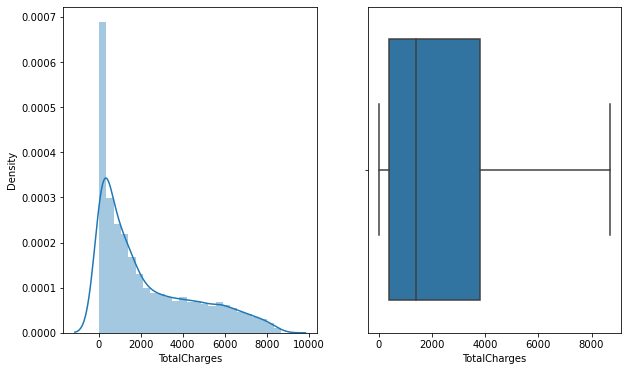

In [19]:
check_dis_outlier(num_col,"TotalCharges")

it is skewed one and has no outlier

Numeric column dont have any outlier however they are skewed.

In [20]:
# Checking skewness in the numerical columns
num_col.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

Total Charges is skewed, we will apply method to correct it

In [21]:
churn_ds["TotalCharges"] = np.cbrt(churn_ds["TotalCharges"])

In [22]:
churn_ds["TotalCharges"].skew()

0.012818570057014016

Skewness has been corrected, have applied log and sqrt transformation but cbrt worked well thus treated the same with cbrt

# EDA

In [23]:
churn_ds.groupby(["gender","Churn"])["Churn"].count()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

Male and Female have same churn ratio

In [24]:
churn_ds.groupby(["gender"]).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,0.163078,32.290841,65.216652,11.365254
Male,0.161736,32.550296,64.387546,11.345427


both gender have same stats. they are almost paying same charges and average theure is also same.

<AxesSubplot:xlabel='PhoneService', ylabel='TotalCharges'>

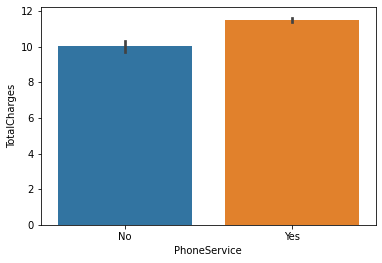

In [25]:
sns.barplot(x="PhoneService", y = "TotalCharges", data = churn_ds)

In [26]:
 pd.pivot_table(churn_ds, values = "TotalCharges", index = ["PhoneService","MultipleLines"], aggfunc = "mean",columns = "Churn")

Churn                                 No        Yes
PhoneService MultipleLines                         
No           No phone service  11.004291   7.122934
Yes          No                 9.867530   7.429445
             Yes               14.900716  11.941814

People who dont have phone service and no multiple line due to no phone service they are paying high as compared to people have phone service but no multiple line.


In [27]:
 pd.pivot_table(churn_ds, values = "TotalCharges", index = ["PhoneService","InternetService"], aggfunc = "mean",columns = "Churn")

Churn                                No        Yes
PhoneService InternetService                      
No           DSL              11.004291   7.122934
Yes          DSL              12.601154   7.561011
             Fiber optic      15.027279  10.621011
             No                8.031932   4.403161

charges are high with Fiber optic as compared to DSL( digital subscriber line), people who no phone service are using DSL connection for internet. <br>

Fiber optic is giving higher revenue as well 


In [28]:
 pd.pivot_table(churn_ds, values = "TotalCharges", index = ["OnlineSecurity","OnlineBackup"], aggfunc = "count",columns = "Churn")

Churn                                      No   Yes
OnlineSecurity      OnlineBackup                   
No                  No                   1138  1057
                    Yes                   898   404
No internet service No internet service  1407   113
Yes                 No                    716   176
                    Yes                  1004   119

people who are not using services, they are more like to churn as we can see from the above table

In [29]:
pd.pivot_table(churn_ds, values = "TotalCharges", index = ["TechSupport"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


No tech support led to high churn rate

In [30]:
pd.pivot_table(churn_ds, values = "TotalCharges", index = ["Contract"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


we have seen high churn rate in month to month cycle. 89% custmer are getting churned out from month to month rental we can say from the over all churn count, may company has to think on the plan benefit revision

In [31]:
pd.pivot_table(churn_ds, values = "TotalCharges", index = ["Contract","PaperlessBilling"], aggfunc = "count",columns = "Churn")

Churn                              No   Yes
Contract       PaperlessBilling            
Month-to-month No                 883   406
               Yes               1337  1249
One year       No                 625    48
               Yes                681   118
Two year       No                 887    15
               Yes                750    33

paperles bill should not be adding any value to churn but we can see the pattern with regard to Yes and high chrun under month to month contract.

In [32]:
pd.pivot_table(churn_ds, values = "TotalCharges", index = ["PaymentMethod"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

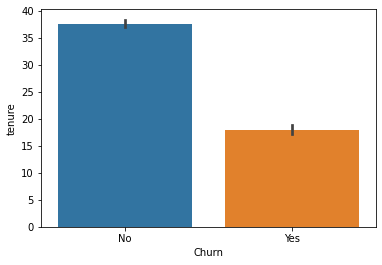

In [33]:
sns.barplot(x = "Churn", y = "tenure", data = churn_ds)

people who churn they average tenure is less 20

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

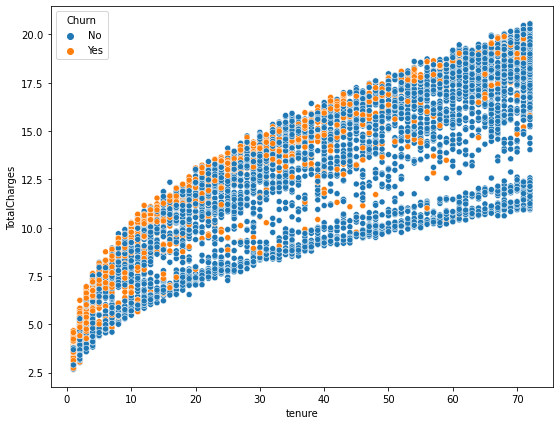

In [34]:
plt.figure(figsize =(9,7))
sns.scatterplot(x ="tenure",y = "TotalCharges", data = churn_ds, hue = "Churn")

we see perfect relation, high tenure high revenue. people are there whose tenure is high but stil their total charges are low, it may be because of they wre using limited services

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

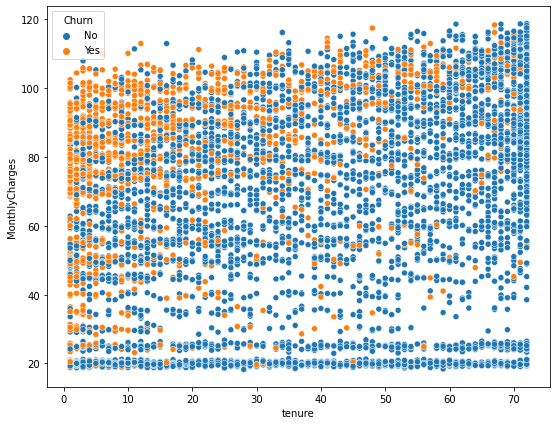

In [35]:
plt.figure(figsize =(9,7))
sns.scatterplot(x ="tenure",y = "MonthlyCharges", data = churn_ds, hue = "Churn")

There is no pattern in the tenure and monthly charges, churn count is more high between 65 to 105 monhtlycharges and below 20 tenure

In [36]:
# Checking the variance of the numeric columns

num_col.var()

SeniorCitizen     1.358745e-01
tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.138252e+06
dtype: float64

All have variance thus they are not constant

# Feature engineering 

In [37]:
churn_ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.102045,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,12.362766,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,4.764407,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,12.255516,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.332704,Yes


In [38]:
# Deleting the ID columns
churn_ds.drop("customerID",axis =1, inplace = True)

# Since maximum columns are categorical, lets transform them with LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
churn_ds["gender"] = le.fit_transform(churn_ds["gender"])
churn_ds["Partner"] = le.fit_transform(churn_ds["Partner"])
churn_ds["Dependents"] = le.fit_transform(churn_ds["Dependents"])
churn_ds["PhoneService"] = le.fit_transform(churn_ds["PhoneService"])
churn_ds["MultipleLines"] = le.fit_transform(churn_ds["MultipleLines"])
churn_ds["InternetService"] = le.fit_transform(churn_ds["InternetService"])
churn_ds["OnlineSecurity"] = le.fit_transform(churn_ds["OnlineSecurity"])
churn_ds["DeviceProtection"] = le.fit_transform(churn_ds["DeviceProtection"])
churn_ds["TechSupport"] = le.fit_transform(churn_ds["TechSupport"])
churn_ds["StreamingTV"] = le.fit_transform(churn_ds["StreamingTV"])
churn_ds["StreamingMovies"] = le.fit_transform(churn_ds["StreamingMovies"])
churn_ds["Contract"] = le.fit_transform(churn_ds["Contract"])
churn_ds["OnlineBackup"] = le.fit_transform(churn_ds["OnlineBackup"])
churn_ds["PaperlessBilling"] = le.fit_transform(churn_ds["PaperlessBilling"])
churn_ds["PaymentMethod"] = le.fit_transform(churn_ds["PaymentMethod"])
churn_ds["Churn"] = le.fit_transform(churn_ds["Churn"])

In [39]:
churn_ds.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [40]:
churn_ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1


<AxesSubplot:>

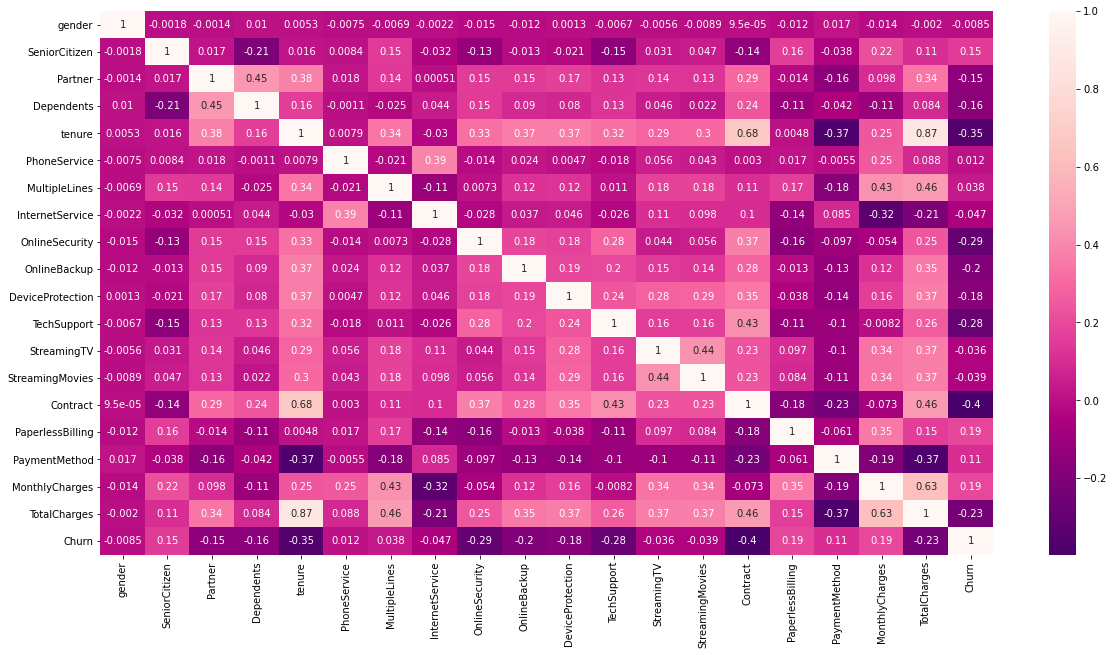

In [41]:
plt.figure(figsize =(20,10))
sns.heatmap(churn_ds.corr(),annot = True, cmap ="RdPu_r")

Tenure is positive correlated with Totalcharges, contract is also postive correlated with tenure. will not delete that columns as will trained data on enseble methods and it will be handled there. 